In [8]:
import numpy as np

T = 5
fs = 44100
f = (432-216)/10*5 + 216
t = np.linspace(0,T,fs*T)
y = np.sin(2*np.pi*f*t)

In [9]:
import scipy.io.wavfile
scipy.io.wavfile.write("/home/samba/potockan/python/test2.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test2.wav

["Playing WAVE '/home/samba/potockan/python/test2.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

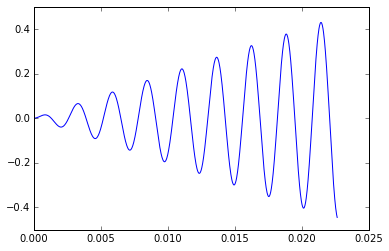

In [27]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(t[0:1000], y[0:1000])
plt.show()

In [58]:
const = 457.69/432

In [66]:
T = 1
fs = 44100
f = 432
f1 = [np.r_[f, f*const**3, f*const**5]]
t = np.linspace(0,T,fs*T)

y = np.r_[np.sin(2*np.pi*f*t), 
          np.sin(2*np.pi*f*(const**3)*t), 
          np.sin(2*np.pi*f*(const**7)*t) ]

scipy.io.wavfile.write("/home/samba/potockan/python/test3.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test3.wav

["Playing WAVE '/home/samba/potockan/python/test3.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

In [84]:
T = 3
fs = 44100
f = 432
t = np.linspace(0,T,fs*T)

y = np.r_[np.sin(2*np.pi*f*t) +
          np.sin(2*np.pi*f*(const**3)*t) +
          np.sin(2*np.pi*f*(const**7)*t) ]

scipy.io.wavfile.write("/home/samba/potockan/python/test4.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test4.wav

["Playing WAVE '/home/samba/potockan/python/test4.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

In [82]:
T = 1
fs = 44100
f = 432
t = np.linspace(0,T,fs*T)

y = np.r_[np.sin(2*np.pi*f*t)]
y = np.sign(y)
print(y)

scipy.io.wavfile.write("/home/samba/potockan/python/test5.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test5.wav

[ 0.  1.  1. ..., -1. -1. -1.]


["Playing WAVE '/home/samba/potockan/python/test5.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

["Playing WAVE '/home/samba/potockan/python/test6.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

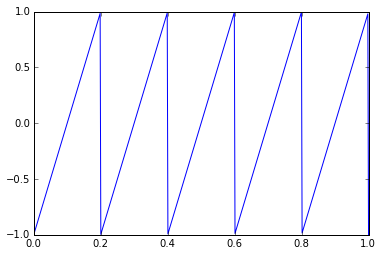

In [93]:
import scipy.signal
t = np.linspace(0, 1, 500)
plt.plot(t, scipy.signal.sawtooth(2 * np.pi * 5 * t))

T = 1
fs = 44100
f = 432
t = np.linspace(0,T,fs*T)

y = scipy.signal.sawtooth(2*np.pi*f*t)


scipy.io.wavfile.write("/home/samba/potockan/python/test6.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test6.wav

In [23]:
import numpy as np
def dzwiek(f, T, a, d):
    fs = 44100
    t = np.linspace(0,T,fs*T)
    y = np.sin(2*np.pi*f*t)
    zaokr = np.round(len(y)*a)
    zaokr1 = np.round(len(y)*d)
    y[0:zaokr] *= np.linspace(0, 1, zaokr)
    y[-zaokr1:] *= np.linspace(0, 1, zaokr1)
    return y

In [24]:
y = dzwiek(432, 5, 0.1, 0.1)
print(y)
scipy.io.wavfile.write("/home/samba/potockan/python/test7.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test7.wav

[  0.00000000e+00   2.78974078e-06   1.11378326e-05 ...,  -1.22777897e-01
  -6.15082047e-02  -1.09748161e-12]


["Playing WAVE '/home/samba/potockan/python/test7.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

In [25]:
y = np.r_[dzwiek(384.87, 0.5, 0.1, 0.1), 
          dzwiek(323.63, 0.5, 0.1, 0.1), 
          dzwiek(323.63, 0.5, 0.1, 0.1),
          dzwiek(342.88, 0.5, 0.1, 0.1),
          dzwiek(288.33, 0.5, 0.1, 0.1),
          dzwiek(288.33, 0.5, 0.1, 0.1),
          dzwiek(256.87, 0.5, 0.1, 0.1),
          dzwiek(323.63, 0.5, 0.1, 0.1),
          dzwiek(384.87, 0.5, 0.1, 0.1),
         ]
scipy.io.wavfile.write("/home/samba/potockan/python/test7.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test7.wav

["Playing WAVE '/home/samba/potockan/python/test7.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

/opt/anaconda/lib/python3.4/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


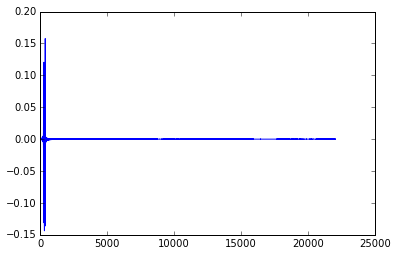

In [33]:
import scipy.fftpack
yf = scipy.fftpack.fft(y)
n = len(y)
xf = np.linspace(0,44100/2, n/2)
plt.plot(xf, 2*(yf[1:int(n/2)+1])/n)
#plt.xscale('log')
plt.show()

In [35]:
fs, y = scipy.io.wavfile.read("/home/samba/potockan/python/Ensoniq-SQ-2-Piano-C7.wav")
y = np.mean(y, axis=1)
y /= 32767

scipy.io.wavfile.write("/home/samba/potockan/python/test8.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test8.wav

["Playing WAVE '/home/samba/potockan/python/test8.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

In [92]:
fs1, y1 = scipy.io.wavfile.read("/home/samba/potockan/python/Snare-Drum-2.wav")
fs2, y2 = scipy.io.wavfile.read("/home/samba/potockan/python/Side-Stick-4.wav")
fs3, y3 = scipy.io.wavfile.read("/home/samba/potockan/python/Deep-Kick.wav")
fs = fs1
y1 = np.tile(y1[:len(y1/2)], 2)
y2 = np.tile(y2[:len(y2/2)], 2)
y3 = np.tile(y3[:len(y3/2)], 2)
y = np.r_[y1, y2]
#y = np.repeat(y, 4, axis = 0)
y = np.tile(y, [4,4])
y = np.mean(y, axis=1)
y /= 32767


scipy.io.wavfile.write("/home/samba/potockan/python/test8.wav", 
                       fs, 
                       np.int16(y/max(np.abs(y))*32767))
!!aplay /home/samba/potockan/python/test8.wav

/opt/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


["Playing WAVE '/home/samba/potockan/python/test8.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono"]

Pakiet `librosa` - do zabawy rozpoznawania featuresów w muzyce